# 1. 画像を読み込み、HLS,HSV Lab,YUV,YCrCbに変換し、それぞれの画像を横⽅向につなげて表⽰


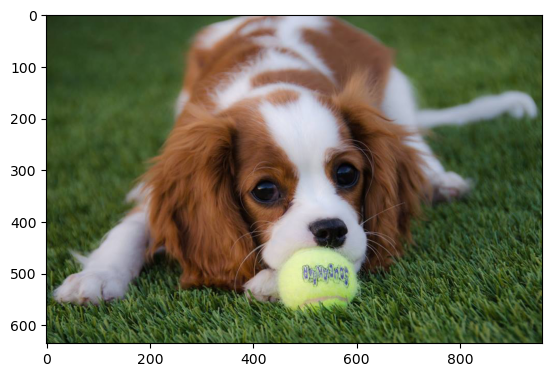

In [13]:
import cv2
import matplotlib.pyplot as plt

img_path = "C:\\Users\\smart25\\Desktop\\img\\img\\dog.jpg"
img = cv2.imread(img_path)
img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_bgr)

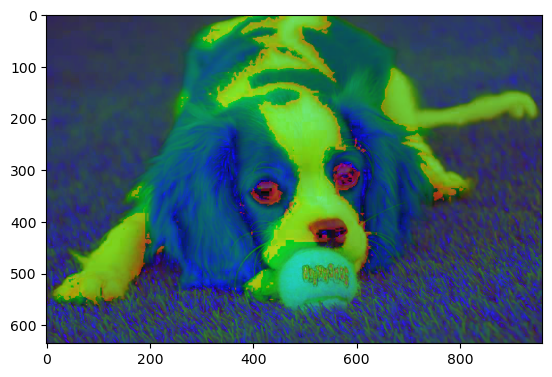

In [14]:
dog_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(dog_hls)

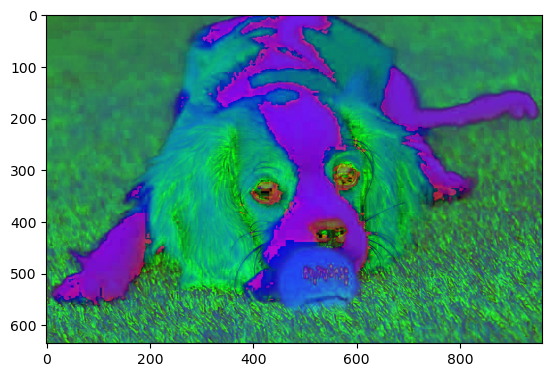

In [15]:
dog_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(dog_hsv, cmap='hsv')

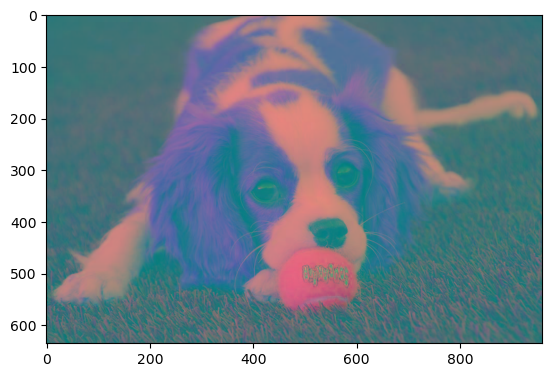

In [16]:
dog_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
plt.imshow(dog_yuv)

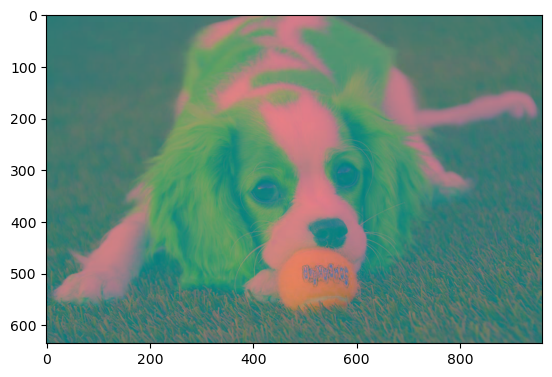

In [17]:
dog_ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
plt.imshow(dog_ycrcb)

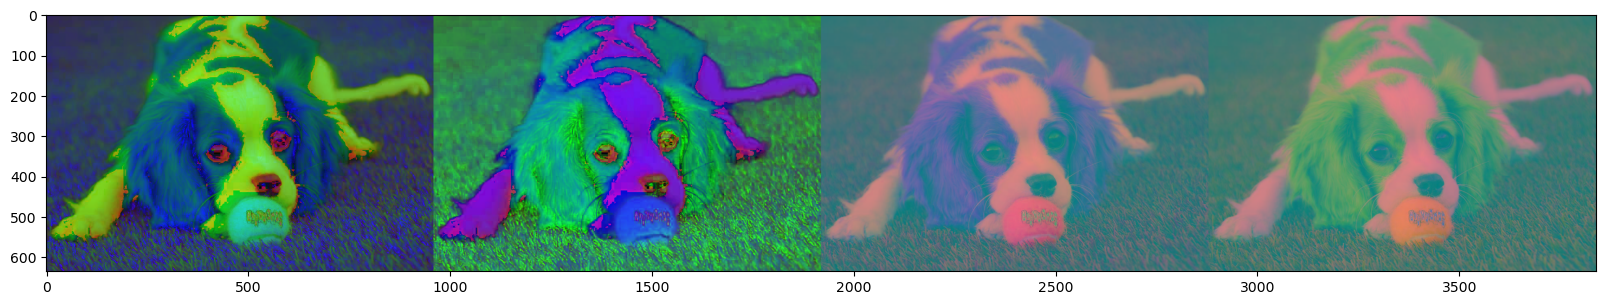

In [18]:
img4_concat = cv2.hconcat([dog_hls, dog_hsv, dog_yuv, dog_ycrcb])
plt.figure(figsize=(20,20))
plt.imshow(img4_concat)

# 2. 2枚の画像をブレンド


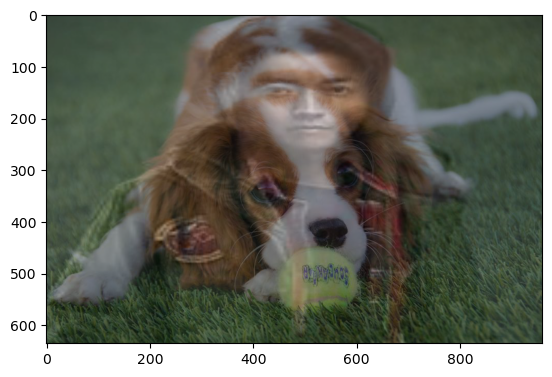

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path1 = "C:\\Users\\smart25\\Desktop\\img\\img\\dog.jpg"
image_path2 = "C:\\Users\\smart25\\Desktop\\img\\img\\OIP.jpg"

image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

resized_image2 = cv2.resize(image2, (image1.shape[1], image1.shape[0]))

blended_image = cv2.addWeighted(image1, 0.5, resized_image2,  0.5, 0)

plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))


# 3. thresholdのthreshパラメータが0, 50, 128, 200の時の画像をそれぞれvconcatを使⽤して縦に並べて表⽰

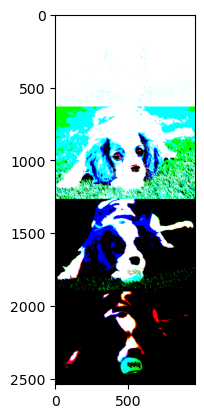

In [5]:
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

image_path = "C:\\Users\\smart25\\Desktop\\img\\img\\dog.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

thresholds = [0, 50, 128, 200]
binary_images = []

for threshold in thresholds:
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    binary_images.append(binary_image)

concatenated_image = np.vstack(binary_images)

plt.imshow(concatenated_image, cmap='gray')

# 4. thresholdTypeパラメータをTHRESH_OTSU, THRESH_TRUNC, THRESH_TOZERO, THRESH_TOZERO_INVに変更し、それぞれの画像を⾏列の結合を以下のように並べて表⽰

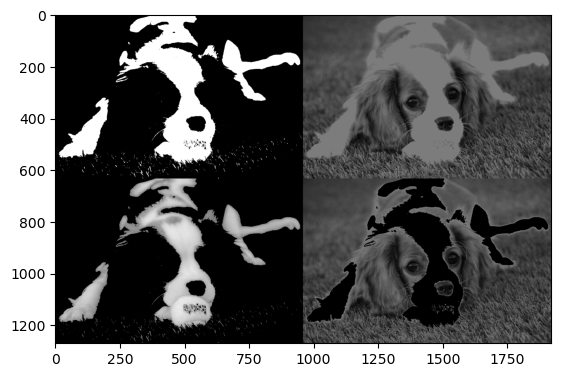

In [6]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = "C:\\Users\\smart25\\Desktop\\img\\img\\dog.jpg"

image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

threshold_types = [cv2.THRESH_OTSU, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]
binary_images = []

for threshold_type in threshold_types:
    if threshold_type == cv2.THRESH_OTSU:
        _, binary_image = cv2.threshold(image_gray, 0, 255, threshold_type)
    else:
        _, binary_image = cv2.threshold(image_gray, 0, 255, threshold_type | cv2.THRESH_OTSU)
    binary_images.append(binary_image)

top_row = np.hstack((binary_images[0], binary_images[1]))
bottom_row = np.hstack((binary_images[2], binary_images[3]))
concatenated_image = np.vstack((top_row, bottom_row))

plt.imshow(concatenated_image, cmap='gray')

# 5. adaptiveThresholdを⽤いてadaptiveMethodがADAPTIVE_THRESH_GAUSSIAN_C,ADAPTIVE_THRESH_MEAN_Cの時の画像をそれぞれ表⽰


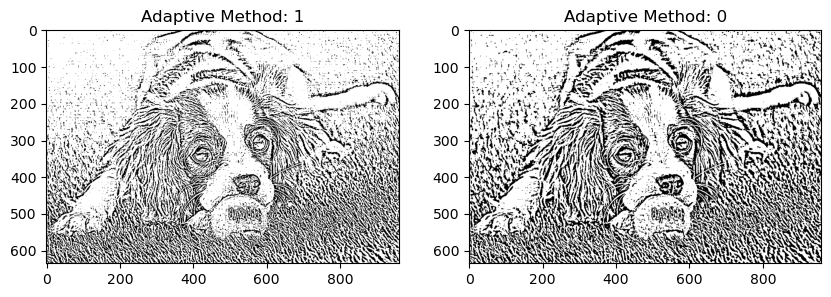

In [8]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_path = "C:\\Users\\smart25\\Desktop\\img\\img\\dog.jpg"

image = cv2.imread(image_path)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

adaptive_methods = [cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.ADAPTIVE_THRESH_MEAN_C]
binary_images = []

for adaptive_method in adaptive_methods:
    binary_image = cv2.adaptiveThreshold(image_gray, 255, adaptive_method, cv2.THRESH_BINARY, 11, 2)
    binary_images.append(binary_image)

fig, axes = plt.subplots(1, len(adaptive_methods), figsize=(10, 5))

for i, (binary_image, adaptive_method) in enumerate(zip(binary_images, adaptive_methods)):
    axes[i].imshow(binary_image, cmap='gray')
    axes[i].set_title(f'Adaptive Method: {adaptive_method}')


# 6. threshold, gray, HSVの画像を⾏列の結合を⽤いて並べ、BGR画像とブレンドして表⽰

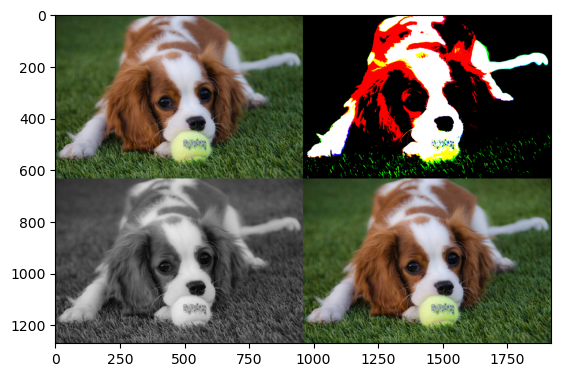

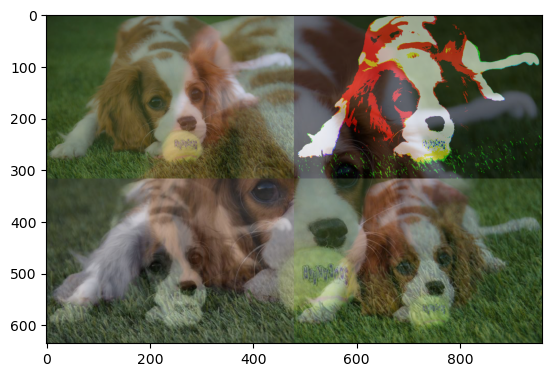

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "C:\\Users\\smart25\\Desktop\\img\\img\\dog.jpg"
image = cv2.imread(image_path)
height, width, _ = image.shape
threshold_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
combined_image_top = np.concatenate((image, threshold_image), axis=1)
combined_image_bottom = np.concatenate((gray_image, hsv_image), axis=1)
combined_image = np.concatenate((combined_image_top, combined_image_bottom), axis=0)
resized_combined_image = cv2.resize(combined_image, (width, height))
blended_image = cv2.addWeighted(image, 0.5, resized_combined_image, 0.5, 0.0)
plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.show()